In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.api import VAR

In [3]:
# Download stock data: Google
df = yf.download("QUBT", start="2023-01-01", end="2025-06-16")[["Close", "Volume"]]

<ipython-input-3-3406240611>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("QUBT", start="2023-01-01", end="2025-06-16")[["Close", "Volume"]]
[*********************100%***********************]  1 of 1 completed


In [4]:
# Normalize (optional for VAR)
data = df.copy()
data["Volume"] = data["Volume"] / 1e6  # scale volume in millions


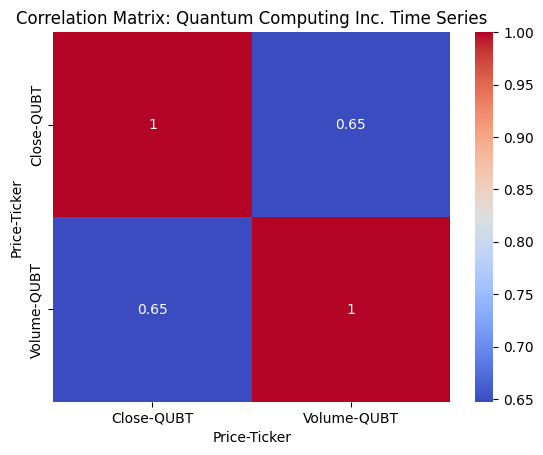

In [6]:
# Visualize correlation
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Quantum Computing Inc. Time Series")
plt.show()

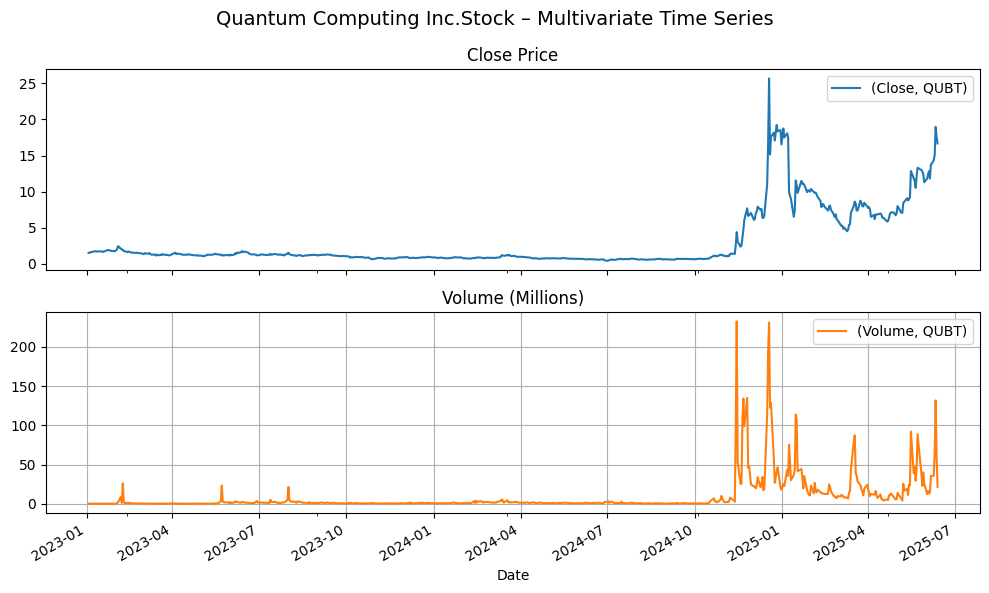

In [7]:
# Plot both series
data.plot(subplots=True, figsize=(10, 6), title=["Close Price", "Volume (Millions)"])
plt.suptitle("Quantum Computing Inc.Stock – Multivariate Time Series", fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()


In [8]:
# Prepare for VAR model
data = data.diff().dropna()  # stationarity
model = VAR(data)
results = model.fit(maxlags=15, ic='aic')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
# Forecast next 5 days
forecast = results.forecast(data.values[-results.k_ar:], steps=5)
forecast_df = pd.DataFrame(forecast, columns=data.columns)
print(forecast_df)

Price      Close     Volume
Ticker      QUBT       QUBT
0      -0.777339  10.526170
1       1.427367  21.274547
2       0.888797  -1.247075
3       0.233504  -4.424658
4       0.997714   2.761495


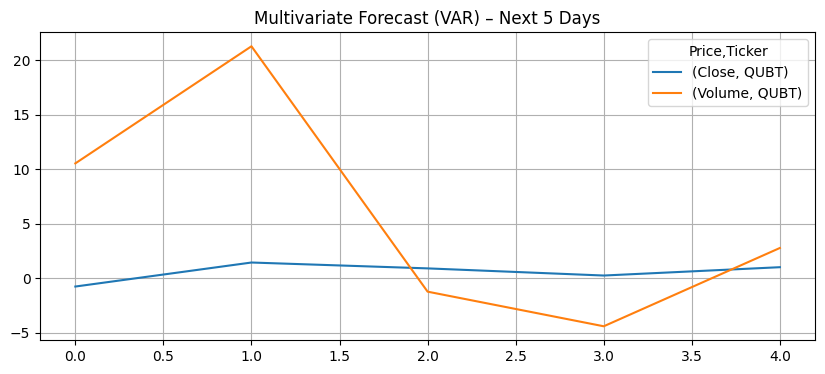

In [11]:
# Plot forecast
forecast_df.plot(title="Multivariate Forecast (VAR) – Next 5 Days", figsize=(10, 4))
plt.grid(True)
plt.show()